# Engenharia do Conhecimento 2023/2024

## Sara C. Madeira  + Sofia Teixeira + Nuno Garcia + André Falcão + Cátia Pesquita, 2022-2024

# Practical 01 - Introduction to Scikit-learn

## 0. Getting Started

In this tutorial, we use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org), [Scikit-learn](http://scikit-learn.org/stable/) and other Python technical libraries, such as [Pandas](http://pandas.pydata.org). 

**In the lab** - Python 3, Jupyter and Scikit-learn are already installed in both Windows and Linux. 

**At home** - you can get Python 3, Jupyter and Scikit-learn by installing [Anaconda](https://www.anaconda.com). 

Once you have Python 3, Jupyter and Scikit-learn you can follow this tutorial by running the examples interactively using the Jupyter notebook (file ML_2223_TP01.ipynb) 
or running the examples using an IDE such as Spyder that is installed with Anaconda.

The tutorial has two main parts:

* **PART 1. Python Technical Libraries**: provinding an overview on Pandas, NumPy, Scikit-learn, Matplotlib and SciPy. The focus is on Pandas, a powerful tool for data analysis, and on the relationship between Pandas, NumPy, and Scikit-learn. 

* **PART 2. Scikit-learn**: providing a first introduction to Scikit-learn by using a classical supervised learning problem as example. 

# 1. Python's Technical Libraries

Python has an excellent suite of libraries available, making it a first‐class environment for technical computing. The main ones are the following ([The Data Science Handbook, F. Cady, Wiley, 2017](http://eu.wiley.com/WileyCDA/WileyTitle/productCd-1119092949.html)):
* **Pandas**: This is a very important library for data analysis. It stores and operates on data in data frames, very efficiently and with a sleek, intuitive API. More info on Pandas [here](http://pandas.pydata.org). 
* **NumPy**: A library for dealing with numerical arrays in ways that are fast and memory efficient, but it is clunky and low level for a user. Under the hood, Pandas operates on NumPy arrays. More info on NumPy [here](http://www.numpy.org).
* **Scikit‐learn**: This is the main machine learning library and it operates on NumPy arrays. You can take Pandas objects, turn them into NumPy arrays, and then plug them into scikit‐learn. More info on Scykit-learn [here](http://scikit-learn.org/stable/).
* **Matplotlib**: This is the main plotting and visualization library. Similar to NumPy, it is low level and a bit clunky to use directly. Pandas provides human‐friendly wrappers that call matplotlib routines. More info on Matplotlib [here](https://matplotlib.org)
* **SciPy**: This provides a suite of functions that perform fancy numerical operations on NumPy arrays. More info on SciPy [here](https://www.scipy.org)

Note that these are not the only technical computing libraries available in Python, but they are by far the most popular, and together they form a cohesive, powerful tool suite for data analysis and machine learning. **NumPy** is the most fundamental library; it defines the core numerical arrays that everything else operates on. However, most of your actual code (especially data munging and feature extraction) will be working within **Pandas**, only switching to the other libraries as needed, and the machine learning algorithms will be executed using **Scikit‐learn**. 

### 1.1. NumPy

[NumPy](http://www.numpy.org) is one of the fundamental packages for scientific computing in Python. It contains functionalities for multidimensional arrays, high-level mathematical functions, such as linear algebra operations and the Fourier transform and pseudo random number generators.

**The NumPy array is the fundamental data structure in scikit-learn**. Scikit-learn takes in data in the form of NumPy arrays. Any data you are using will have to be converted to a NumPy array. 

The core functionality of NumPy is **``ndarray``**, with ``n`` dimensions and where all elements must be the same type. 

A NumPy array looks like this:

In [1]:
import numpy as np

np

<module 'numpy' from 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\numpy\\__init__.py'>

In [2]:
# creating a ndarray

x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [3]:
type(x)

numpy.ndarray

**ndarray** can be used just like a matrix - with index access to rows and values.

In [4]:
# first row

x[0]

array([1, 2, 3])

In [5]:
# value on first row and second column

x[0][1]

2

In [6]:
# value value on the first row and second column

x[0][1]=0
x

array([[1, 0, 3],
       [4, 5, 6]])

**Both Pandas and Scikit-learn use NumPy functions and the ndarray data structure.**

#### Exercise
* create your ndarray with a 3 x 3 matrix with all numbers from 1 to 9
* set all diagonal values to 0. - HINT: [You can use this](https://numpy.org/doc/stable/reference/generated/numpy.fill_diagonal.html)


In [7]:
y = np.array([[1,2,3],[4,5,6],[7,8,9]])
y
#regular way
for a in range(y.size):
    for b in range(y[0].size):
        if a==b:
            y[a][b] = 0
    
y

#using numpy function
np.fill_diagonal(y,0)
y

array([[0, 2, 3],
       [4, 0, 6],
       [7, 8, 0]])

### 1.2. SciPy

[SciPy](http://www.numpy.org) is a collection of functions for scientific computing. It provides, among other functionality, advanced linear algebra routines, mathematical function optimization, signal processing, special mathematical functions, and statistical distributions. **Scikit-learn draws from SciPy’s collection of functions for implementing its algorithms.**

The most important part of SciPy for us is scipy.sparse with provides **sparse matrices**, which is **another representation that is used for data in Scikit-learn**. Sparse matrices are used whenever we want to store a 2D-array that contains mostly zeros and we want to efficiently store all the non-zero values without wasting memory storing the zeros:

In [8]:
from scipy import sparse

sparse

<module 'scipy.sparse' from 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\scipy\\sparse\\__init__.py'>

In [9]:
# create a 2d numpy array with a diagonal of ones, and zeros everywhere else

eye = np.eye(4) #cria uma matriz diagonal da ordem dada
#eye2 = np.eye(2)

print("Numpy array:\n", eye)
#print("Numpy array:\n", eye2)

Numpy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [10]:
# convert the numpy array to a scipy sparse matrix in CSR format
# In CSR (Compressed Sparse Row matrix) format only the non-zero entries are stored

sparse_matrix = sparse.csr_matrix(eye)

print("\nScipy sparse CSR matrix:\n", sparse_matrix)


Scipy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### Exercise
* create a ndrray of (10, 10), with only the diagonal filled with numbers from 1 to 10 and the rest zeros.  HINT: [You can use this](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)
* convert it to a sparse matrix and print it (use print())


In [11]:
a = np.zeros((10,10), dtype=int)
np.fill_diagonal(a, np.arange(1,11))
a

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

### 1.3. Matplotlib

[Matplotlib](https://matplotlib.org) is the primary scientific plotting library in Python. It provides functions for making publication-quality visualizations such as line charts, histograms, scatter plots, and so on. Visualizing your data and any aspects of your analysis can give you important insights.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111 -0.99999021
 -0.53657292  0.42016704  0.99060736  0.65028784 -0.28790332 -0.96139749
 -0.75098725  0.14987721]


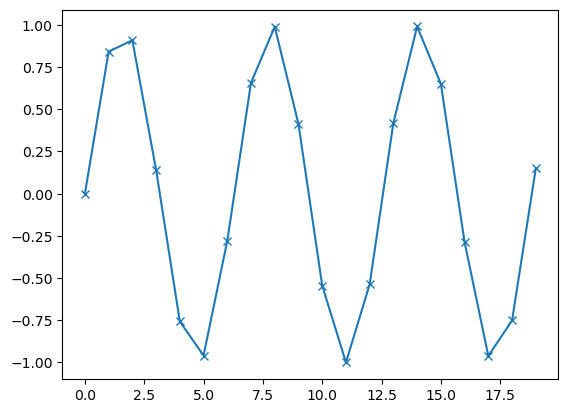

In [12]:
import matplotlib.pyplot as plt
# Generate a sequence of integers
x = np.arange(20)
print (x)

# create a second array using sinus
y = np.sin(x)
print (y)

# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

#### Exercises
* Check the [numpy linspace function](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* Create a linear space from -$3\pi$ to $3\pi$ with 100 points
* make the same plot above using the sine function
* Make a new plot where you will add to the plot the cosine at 5x the frequence
* Make a new plot where all 3 lines appear together


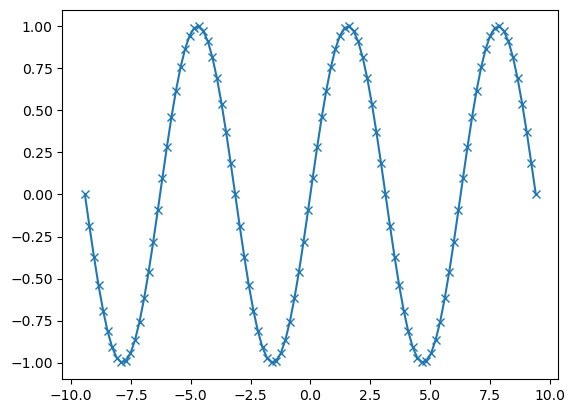

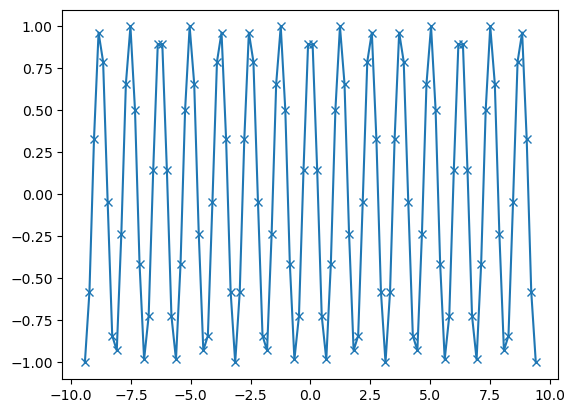

In [190]:
space = np.linspace(-3*np.pi, 3*np.pi, 100) #creating the linear space
space_sine = np.sin(space) #making the same but with the sine
space_cosine = np.cos(space*5)

plt.plot(space, space_sine, marker="x")
plt.show()
plt.plot(space, space_cosine, marker="x")
plt.show()


### 1.4. Pandas

[Pandas](http://pandas.pydata.org) is a powerful and widely used Python library for data wrangling and analysis. It is built around a data structure called **DataFrame**, that is modeled after the R DataFrame. Simply put, a Pandas DataFrame is a table, similar to an Excel Spreadsheet. Pandas provides a great range of methods to modify and operate on this table, in particular it allows SQL-like queries and joins of tables. Another valuable tool provided by Pandas is its ability to ingest from a great variety of file formats and databases, such as SQL, Excel files, and comma separated value (CSV) files.

The rest of this section will be a quick crash course on the **basic data structures of Pandas: Data Frames and Series** following ideas and examples in [The Data Science Handbook, F. Cady, Wiley, 2017](http://eu.wiley.com/WileyCDA/WileyTitle/productCd-1119092949.html). You can read more on Pandas [here](http://pandas.pydata.org). A very good reference on Pandas is the book ([Python for Data Analysis](http://wesmckinney.com/pages/book.html) written by its author Wes Mckinney.

### Data Frames

The central data structure in Pandas is called a **DataFrame**, which is a table with rows and columns, where each column holds data of a particular type, such as integers, strings, or floats. 

DataFrames make it easy and efficient to apply a function to every element in a column or to calculate aggregates such as the sum of a column. Some of the basic operations on data frames are shown is what follow (**more info** [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)).

In [102]:
# import Pandas and alias it as pd

import pandas as pd

pd

<module 'pandas' from 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>

In [103]:
# Creating a DataFrame from a Dictionary that maps column names to their values

df = pd.DataFrame({
  "name": ["Bob", "Alex", "Janice"],
  "age": [60, 25, 33]
  })

df

,name,age
0,Bob,60
1,Alex,25
2,Janice,33


In [104]:
# size

df.size

6

In [105]:
# number of columns 

len(df.columns)

2

In [106]:
# column identifiers

df.columns

Index(['name', 'age'], dtype='object')

In [107]:
# number of rows 

len(df)

3

In [108]:
# Checking values of a specific column

df["age"]

0    60
1    25
2    33
Name: age, dtype: int64

In [109]:
# Checking values of a specific column

df["name"]

0       Bob
1      Alex
2    Janice
Name: name, dtype: object

In [110]:
# Making new columns from old ones is really easy

df["age_plus_one"] = df["age"] + 1 

df["age_times_two"] = 2 * df["age"] 

df["age_squared"] = df["age"]**2

df["over_30"] = (df["age"] > 30) # this column is bools

df

,name,age,age_plus_one,age_times_two,age_squared,over_30
0,Bob,60,61,120,3600,True
1,Alex,25,26,50,625,False
2,Janice,33,34,66,1089,True


In [111]:
# Checking values of column "over_30"

df["over_30"]

0     True
1    False
2     True
Name: over_30, dtype: bool

In [112]:
# The columns can have several built-in aggregate functions such as:

#sum
total_age = df["age"].sum()

total_age

118

In [113]:
# The columns can have several built-in aggregate functions such as:

# median
median_age = df["age"].quantile(0.5)

median_age

33.0

In [114]:
# The columns can have several built-in aggregate functions such as:

# mean
mean_age = df["age"].mean()

mean_age

39.333333333333336

In [115]:
# You can select several rows of the DataFrame and make a new DataFrame out of them

print(df)

df_age_below_50 = df[df["age"] < 50] #o objeto df já é um dataFrame então vai ser um dataFrame do data frame anterior no qual "age"<50

df_age_below_50

     name  age  age_plus_one  age_times_two  age_squared  over_30
0     Bob   60            61            120         3600     True
1    Alex   25            26             50          625    False
2  Janice   33            34             66         1089     True


,name,age,age_plus_one,age_times_two,age_squared,over_30
1,Alex,25,26,50,625,False
2,Janice,33,34,66,1089,True


In [116]:
# You can select several rows of the DataFrame and make a new DataFrame out of them

df_below_30 = df[df["over_30"] == False]

df_below_30

,name,age,age_plus_one,age_times_two,age_squared,over_30
1,Alex,25,26,50,625,False


In [117]:
# You can also make selections using more complex logic expressions

# all rows with 'age' above 30, but without the name  "Bob"

df_30_notBob = df[(df['age']>30) & ~(df['name'] == 'Bob')]
df_30_notBob

,name,age,age_plus_one,age_times_two,age_squared,over_30
2,Janice,33,34,66,1089,True


In [118]:
# You can also apply a custom function to a column 

def f(x):
    return x**2

df["age_squared"] = df["age"].apply(f)

df

,name,age,age_plus_one,age_times_two,age_squared,over_30
0,Bob,60,61,120,3600,True
1,Alex,25,26,50,625,False
2,Janice,33,34,66,1089,True


In [119]:
# Apply a custom function to a column - another way

df["age_squared"] = df["age"].apply(lambda x: x**2)

df

,name,age,age_plus_one,age_times_two,age_squared,over_30
0,Bob,60,61,120,3600,True
1,Alex,25,26,50,625,False
2,Janice,33,34,66,1089,True


In [120]:
# Creating the index

df = pd.DataFrame({
  "name": ["Bob", "Alex", "Jane"],
  "age": [60, 25, 33]
  })

df.index

RangeIndex(start=0, stop=3, step=1)

In [121]:
# prints 0‐2, the line numbers

nr = len(df) # number of rows

for i in range(nr):
    print(df.index[i])

0
1
2


In [122]:
# Get row 0 (data in df is indexed by row number starting at 0)

df.iloc[0]

name    Bob
age      60
Name: 0, dtype: object

In [123]:
# Create a DataFrame containing the same data, but where column "name" is the index

df_w_name_as_index = df.set_index("name")

df_w_name_as_index

,age
name,
Bob,60
Alex,25
Jane,33


In [124]:
# data in df is now indexed by name

df_w_name_as_index.index 

Index(['Bob', 'Alex', 'Jane'], dtype='object', name='name')

In [125]:
# Get the row for Bob (row where "name"='Bob')

bobs_row = df_w_name_as_index.loc["Bob"] 

bobs_row

age    60
Name: Bob, dtype: int64

In [126]:
# Get value in column "age" in the row where "name" is Bob

bobs_row["age"]

60

#### Exercise

* Modify the following code to create a DataFrame from Dictionary data 
* Add the Column IncomeYear as the product of Monthly income x 12
* Create a new column continent that assumes that everyone wors in Europe unless they work at the New York, in that case the continet becomes America


In [127]:
# create a simple dataset of people

data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'IncomeMonth' : [2400, 1300, 5300, 3300]
       }
frame = pd.DataFrame(data)
frame["IncomeYear"] = frame["IncomeMonth"]*12
frame["Continent"] = "Europe"
frame.loc[frame["Location"] == "New York", "Continent"] = "America"
frame


,Name,Location,IncomeMonth,IncomeYear,Continent
0,John,New York,2400,28800,America
1,Anna,Paris,1300,15600,Europe
2,Peter,Berlin,5300,63600,Europe
3,Linda,London,3300,39600,Europe




Consider the **.csv** file (comma separated file) named **``myfile.csv``** with 4 rows and 2 columns provided with this notebook. The first row has the column names: **``name``** and **``age``**, and rows 1 to 3 the following values:  Bob, 60; Alex, 25; and Jane, 33. 

Create a Data Frame from your .csv file as follows:

In [128]:
# Reading a DataFrame from a file

other_df = pd.read_csv("myfile.csv")

other_df

,Name,Age
0,Bob,40
1,Alex,25
2,Jane,33


### Series

Besides DataFrames, the other important data structure in Pandas is **Series**: a column in a DataFrame is a Series. Conceptually, a Series is just an array of data objects with an index associated. The columns of a DataFrame are Series objects that all happen to share the same index. The following code shows some  basic Series operations (**more info** [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)):

In [129]:
# import Pandas and alias it as pd
import pandas as pd

In [130]:
# Make Series from list

s = pd.Series([1,2,3]) 

# display the values in s. Note that the index is on the left.
s

0    1
1    2
2    3
dtype: int64

In [131]:
# Add a number to each element of s

s+2 

0    3
1    4
2    5
dtype: int64

In [132]:
# Note that s did not change

s

0    1
1    2
2    3
dtype: int64

In [133]:
# if you want the change to be efective

s = s+2

s

0    3
1    4
2    5
dtype: int64

In [134]:
# Adding two series will add corresponding elements to each other

s + pd.Series([4,4,5])

0     7
1     8
2    10
dtype: int64

In [135]:
# Note again that s did not change

s

0    3
1    4
2    5
dtype: int64

In [136]:
# Note that as above now s changes

s = s + pd.Series([4,4,5])

s

0     7
1     8
2    10
dtype: int64

### Joining and Grouping

So far we have focused on the following DataFrame operations: 
* Creating data frames
* Adding new columns that are derived from basic operations on existing columns
* Using simple conditions to select rows in a DataFrame
* Aggregating columns
* Setting columns to function as an index, and using the index to pull out rows of the data.

This section discusses two more advanced operations: **joining and grouping**. 

These may be familiar to you from working with SQL. You can read more on **join** [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) and more on **groupby** [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).

[Joining](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) is used if you want to combine two separate data frames into a single frame containing all the data. 

We take two data frames, match up rows that have a common index, and combine them into a single frame.

In [137]:
df_w_age = pd.DataFrame({
  "name": ["Tom", "Tyrell", "Claire"],
  "age": [60, 25, 33]
  })

df_w_age

,name,age
0,Tom,60
1,Tyrell,25
2,Claire,33


In [138]:
df_w_height = pd.DataFrame({
  "name": ["Tom", "Tyrell", "Claire"],
  "height": [6.2, 4.0, 5.5]
  })

df_w_height

,name,height
0,Tom,6.2
1,Tyrell,4.0
2,Claire,5.5


In [139]:
# Join df_w_age and df_w_height using the common index "name"
# (Index should be similar to one of the columns)

joined = df_w_age.set_index("name").join(df_w_height.set_index("name"))

joined

,age,height
name,,
Tom,60,6.2
Tyrell,25,4.0
Claire,33,5.5


In [140]:
# You can then create an index on row number

joined.reset_index()

,name,age,height
0,Tom,60,6.2
1,Tyrell,25,4.0
2,Claire,33,5.5


[Grouping](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) is used when we want to group the rows based on some property and aggregate each group separately. 

This is done with the **groupby** function.

In [141]:
# Create a DataFrame from a Dictionary

df = pd.DataFrame({"name": ["Tom", "Tyrell", "Claire"], 
                    "age": [60, 25, 33],
                   "height": [6.2, 4.0, 5.5],
                   "gender": ["M", "M", "F"]})
df

,name,age,height,gender
0,Tom,60,6.2,M
1,Tyrell,25,4.0,M
2,Claire,33,5.5,F


In [142]:
# Use built-in aggregation functions: groupby gender and compute mean

means = df.groupby("gender").mean(numeric_only=True)

means

,age,height
gender,,
F,33.0,5.5
M,42.5,5.1


In [143]:
# Append two extra rows to df

df_new = pd.DataFrame({"name": ["Peter", "Susan"], 
                    "age": [60, 25],
                   "height": [6.2,  5.5],
                   "gender": ["M", "F"]})

df = pd.concat([df, df_new])
df

,name,age,height,gender
0,Tom,60,6.2,M
1,Tyrell,25,4.0,M
2,Claire,33,5.5,F
0,Peter,60,6.2,M
1,Susan,25,5.5,F


In [144]:
# Groupby age and computer mean

mean = df.groupby("age").mean(numeric_only=True)

mean

,height
age,
25,4.75
33,5.50
60,6.20


In [145]:
# Use a custom aggregation function

def agg(df):
    return pd.Series({"name": max(df["name"]), 
                  "oldest": max(df["age"]),
                  "mean_height": df["height"].mean()})

# groupby gender and apply function agg

df.groupby("gender").apply(agg)

,name,oldest,mean_height
gender,,,
F,Susan,33,5.500000
M,Tyrell,60,5.466667


### Converting a DataFrame to a NumPy array

**To convert a DataFrame into a NumPy array use the .values property. This is important since Scikit-learn works with NumPy arrays.**

In [146]:
import pandas as pd
import numpy as np

In [147]:
df = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [0.01, -0.01, 0.25, -4.1, 0.],
                     'z': [-1.5, 0., 3.6, 1.3, -2.]})
df

,x,y,z
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [148]:
type(df)

pandas.core.frame.DataFrame

In [149]:
df.columns

Index(['x', 'y', 'z'], dtype='object')

In [150]:
df.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [151]:
dfValuesAsArray = df.values

type(dfValuesAsArray)

numpy.ndarray

In [152]:
dfValuesAsArray

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

For some machine learning models, you may only wish to **use a subset of the columns**. 

In this case you can use **loc indexing with values** to get the desired subset of columns:

In [153]:
model_cols = ['x', 'y']

df.loc[:, model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

**To convert back to a DataFrame you can pass a two-dimensional ndarray with optional column names:**

In [154]:
df2 = pd.DataFrame(dfValuesAsArray)

df2

,0,1,2
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


In [155]:
df2 = pd.DataFrame(dfValuesAsArray, columns=['x', 'y', 'z'])

df2

,x,y,z
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


Note that the .values attribute contains only numeric types as in the example above, when your data is homogeneous, but the **.values attribute can also be an ndarray of Python objects**, when your data is heterogeneous as in the example below. 

In either case **you can use the ndarray obtained from .values in Skikit-learn**.

In [156]:
df3 = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [0.01, -0.01, 0.25, -4.1, 0.],
                     'z': [-1.5, 0., 3.6, 1.3, -2.]})

df3

,x,y,z
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [157]:
# add a column named "strings" to the DataFrame

df3['strings'] = ['a', 'b', 'c', 'd', 'e']

df3

,x,y,z,strings
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.0,e


In [158]:
df3.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.0, 'e']], dtype=object)

In [159]:
type(df3.values)

numpy.ndarray

In [160]:
df3AsArray = df3.values

df3AsArray

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.0, 'e']], dtype=object)

## 2. Scikit-learn

This section is based almost entirely on Chapter 1 from the book [Introduction to Machine Learning with Python: A Guide for Data Scientists, Sarah Guido&Andreas Müller, 2016](https://www.safaribooksonline.com/library/view/introduction-to-machine/9781449369880/).  We will go through a simple machine learning application and create our first model.

### A First Application: Classifying iris species

Let’s assume that a hobby botanist is interested in distinguishing what is the species of some iris flowers that she found. She has collected some measurements associated with the iris: the length and width of the petals, and the length and width of the sepal, all measured in centimeters.

She also has the measurements of some irises that have been previously identified by an expert botanist as belonging to the species Setosa, Versicolor or Virginica. For these measurements, she can be certain of which species each iris belongs to. Let’s assume that these are the only species our hobby botanist will encounter in the wild.

**Our goal is to build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new iris.** Thus, the desired output for a single data point (an iris) is the predicted species of this flower. This is a classical **supervised learning problem**.

### 2.1. Meet the Data

We use the **iris dataset**, a classical dataset in machine learning and statistics. It is included in scikit-learn in the **datasets module** and can be loaded by calling the load_iris function:

In [161]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

The iris object that is returned by load_iris is a **Bunch object**, which is very similar to a dictionary. 

In [162]:
type(iris_dataset)

sklearn.utils._bunch.Bunch

**Take a look at the dataset:**

Similarly to a Dictionary **it contains keys and values**:

In [163]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [164]:
#You can see a description of the dataset by printing the DESCR key:

print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**The data itself is contained in the target and data fields.**

The data contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a numpy array:

In [165]:
#first 10 rows of data
print(iris_dataset["data"][:10,:])
print(iris_dataset["target"][:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


The value with key target_names is an array of strings, containing the species of flower we want to predict:

In [166]:
type(iris_dataset['data'])

numpy.ndarray

The rows in the data array correspond to flowers, while the columns represent the four measurements that were taken for each flower. 

Take a look at the ** size of the dataset**:

In [167]:
iris_dataset['data'].shape

(150, 4)

**The shape of the data array is the number of samples times the number of features.
This is a convention in scikit-learn and your data will always be assumed to be in this shape.**

In [168]:
# feature values of the first 5 examples

iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

The target array contains the species of each of the flowers that were measured, also
as a numpy array:

In [169]:
# target

type(iris_dataset['target'])

numpy.ndarray

In [170]:
# target of the first 5 learning examples

iris_dataset['target'][:5]

array([0, 0, 0, 0, 0])

**The target is a one-dimensional array**, with one entry per flower:

In [171]:
iris_dataset['target'].shape

(150,)

The species are encoded as integers from 0 to 2. The meaning of the numbers are given by the iris['target_names'] array: 0 means Setosa, 1 means Versicolor and 2 means Virginica.

In [172]:
# target

iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2.2. Measuring Success: Training and Testing data

To assess the models’ performance, we show the model new data (that it hasn’t seen before) for which we have labels. This is usually done by splitting the labeled data we have collected (here our 150 flower measurements) into two parts.
One part of the data is used to build our machine learning model and is called the **training data or training set**. The rest of the data will be used to access how well the model works and is called test data, **test set or hold-out set**.

**Scikit-learn contains a function that shuffles the dataset and splits it for you, the train_test_split function.** This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels are declared as the test set. How much data you want to put into the training and the test set respectively depends on the problem, but using a test-set containing 25% of the data is a good rule of thumb.

**In scikit-learn, data is usually denoted with a capital X, while labels are denoted by a lower-case y.**

Let's call train_test_split on our data and assign the outputs using this nomenclature:

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'], 
                                                    random_state=0) #random_state= 0  para que esta divisão seja sempre feita da mesma maneira

To make sure that we will get the same output if we run the same function several times, we provide the pseudo random number generator with a fixed seed using the **random_state parameter**. This will make the outcome deterministic, so this line will always have the same outcome.

The train_test_split function outputs X_train, X_test, y_train and y_test, which are all numpy arrays. X_train contains 75% of the rows of the dataset, and X_test contains the remaining 25%:

In [174]:
X_train.shape

(112, 4)

In [175]:
X_test.shape

(38, 4)

### 2.3. First Things  First: Look at Your Data

Before building a machine learning model, it is often a good idea to inspect the data, to see if the task is easily solvable without machine learning, or if the desired information might not be contained in the data. One of the best ways to inspect data is to visualize it. One way to do this is by using a **scatter plot**. 

A scatter plot of the data puts one feature along the x-axis, one feature along the y- axis, and draws a dot for each data point. Unfortunately, computer screens have only two dimensions, which allows us to only plot two (or maybe three) features at a time. It is difficult to plot datasets with more than three features this way. One way around this problem is to **do a pair plot, which looks at all pairs of two features**. If you have a small number of features, such as the four we have here, this is quite reasonable. You should keep in mind that a pair plot does not show the interaction of all of features at once, so some interesting aspects of the data may not be revealed when visualizing it this way.

Here is a pair plot of the features in the training set (don't worry abour the details in the code, the important here are the plots). The data points are colored according to the species the iris belongs to:

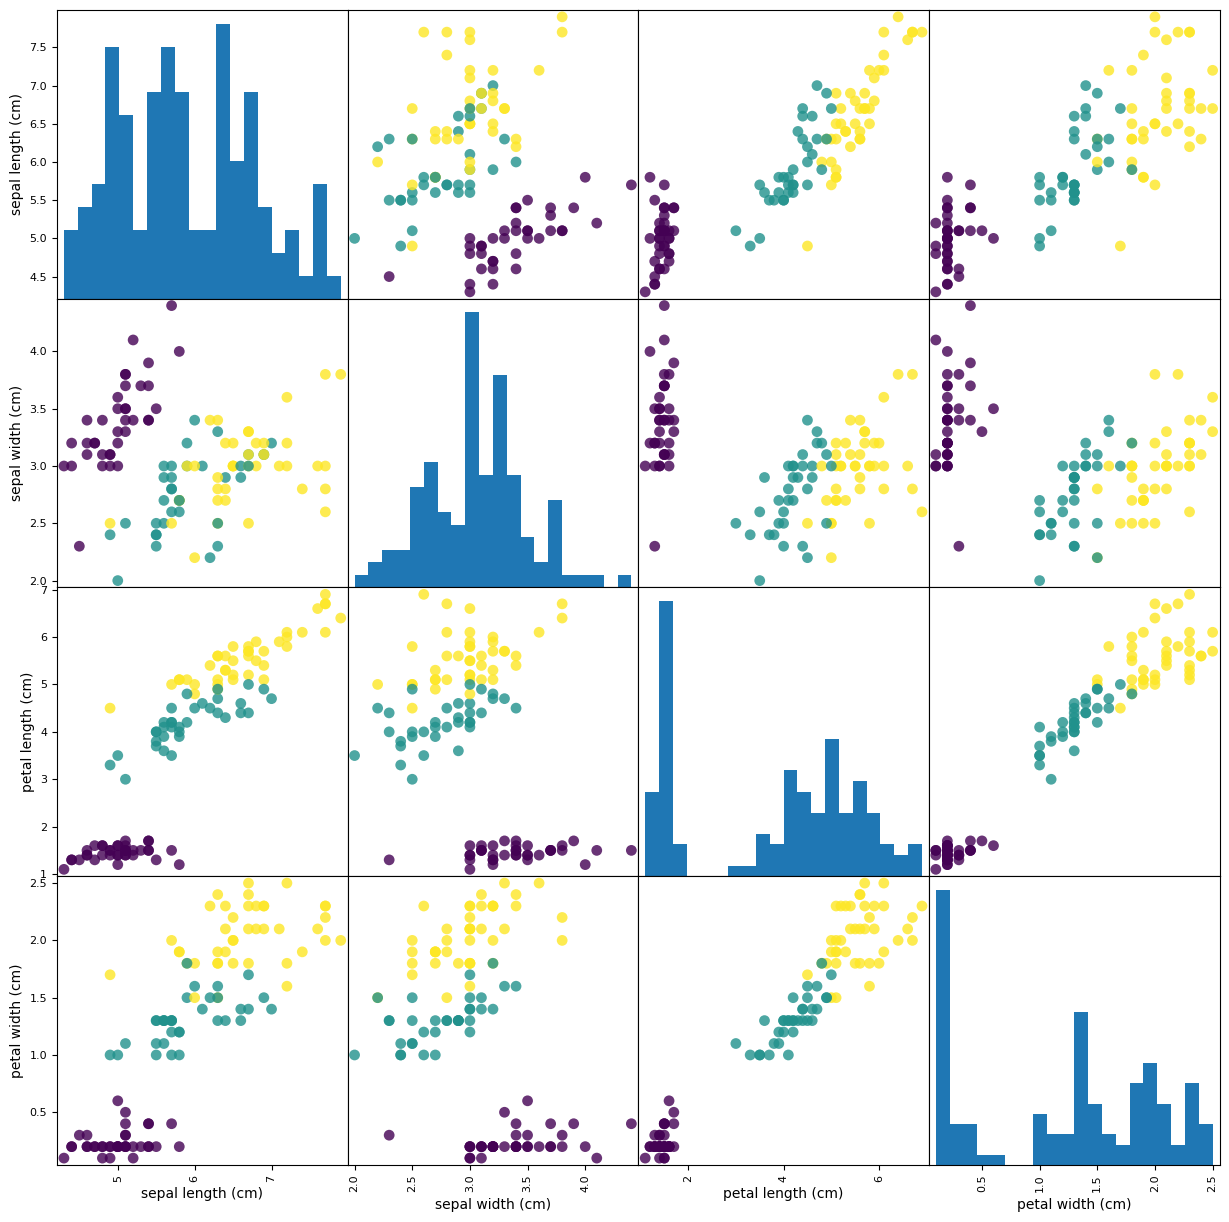

In [176]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train

pd.plotting.scatter_matrix(iris_dataframe, 
                           c=y_train, 
                           figsize=(15, 15),
                           marker='o', 
                           hist_kwds={'bins': 20}, 
                           s=60, 
                           alpha=.8)
plt.show()

From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. This means that a simple machine learning model will likely be able to learn to separate them.

### 2.4. Building your First model: k-Nearest Neighbors

Here we will use a **k-nearest neighbors classifier**, which is easy to understand: this algorithm stores the training set, and in order to make a prediction for a new data point finds the point in the training set that is closest to the new point. Then, it simply assigns the label of this closest data training point to the new data point.

The k in k nearest neighbors stands for the fact that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (for example, the closest three or five neighbors). Then, we can make a prediction using the majority class among these neighbors. We use only a single neighbor for now.

**All machine learning models in scikit-learn are implemented in their own class, which are called Estimator classes.**

The k nearest neighbors classification algorithm is implemented in the **KNeighborsClassifier** class in the neighbors module. Before we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The single parameter of the KNeighbor sClassifier is the number of neighbors, which we will set to one:

In [177]:
from sklearn.neighbors import KNeighborsClassifier

# use k nearest neigbors with k=1
knn = KNeighborsClassifier(n_neighbors=1)

The knn object encapsulates the algorithm to build the model from the training data, as well the algorithm to make predictions on new data points. It will also hold the information the algorithm has extracted from the training data. 

**To build the model on the training set, we call the fit method of the knn object**, which takes as arguments the numpy array X_train containing the training data and the NumPy array y_train of the corresponding training labels:

In [178]:
# training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 2.5. Making Predictions

**We can now use the trained model to make predictions on new data, for which we might not know the correct labels.** 

Imagine we found an iris in the wild with a sepal length of 5cm, a sepal width of 2.9cm, a petal length of 1cm and a petal width of 0.2cm. What species of iris would this be ?

In [179]:
# store the new data in a NumPy array

X_new = np.array([[5, 2.9, 1, 0.2]])

X_new

array([[5. , 2.9, 1. , 0.2]])

**To make prediction we call the predict method** of the knn object:

In [180]:
prediction = knn.predict(X_new)

prediction

array([0])

Our model predicts that this new iris belongs to the class 0, meaning its species is Setosa.

In [181]:
iris_dataset['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [182]:
# what happens if we use 3 neighbors ?

knn3 = KNeighborsClassifier(n_neighbors=3)

knn3.fit(X_train, y_train)

prediction2 = knn3.predict(X_new)

iris_dataset['target_names'][prediction2]

array(['setosa'], dtype='<U10')

**The prediction does not change, although it could change since the model is not the same.**

**How do we know whether we can trust the model?** We don’t know the correct species of this sample, and we shoudn't know since this is the whole point of building the model, but can we somehow evaluate how good is the model, that is, how likely is how model to behave well in unseen data ?

### 2.6. Evaluating the Model

**This is where the test set that we created earlier comes in.** 

This data was not used to build the model, but we do know what the correct species are for each iris in the test set.

In this context, we can make a prediction for an iris in the test data, and compare it against its label (the known species). 

We can then measure how well the model works by computing, for example, its **accuracy**, which is the fraction of flowers for which the right species was predicted:

In [183]:
# accuracy of knn with 1 neigbour

y_pred = knn.predict(X_test)

np.mean(y_pred == y_test)

0.9736842105263158

We can also use the score method of the knn object, which will compute the **accuracy in the test set**:

In [184]:
knn.score(X_test, y_test)

0.9736842105263158

For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. 

Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises. Thus, for our hobby botanist application, this a high level of accuracy means that our models may be trustworthy enough to use.

Note that in this case the accuracy in the train set is 100%. **Note also that the accuracy  in the train set is usually highter than the accuracy in the test set, although not 100% in most cases.**

In [185]:
y_pred = knn.predict(X_train)

np.mean(y_pred == y_train)

1.0

### 2.7. Summary
   
**The following code contains the core code for applying any machine learning algorithms using scikit-learn. The fit, predict and score methods are the common interface to supervised models in scikit-learn.**

In [186]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                     iris_dataset['target'],
                                                    random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.9736842105263158

**Once we have trained the model (classifier) we can use it classify new examples using the function predict**.

In [187]:
X_new = np.array([[5, 2.9, 1, 0.2]])

prediction = knn.predict(X_new)

prediction

array([0])

#### Exercise:

* Using the Iris Dataset with the partition below change the number of neighbours from 1 to 10 and print out the scores of the classification
* What do you think is the best k?
* Bonus Exercise: Plot the k vs the scores and check the general pattern



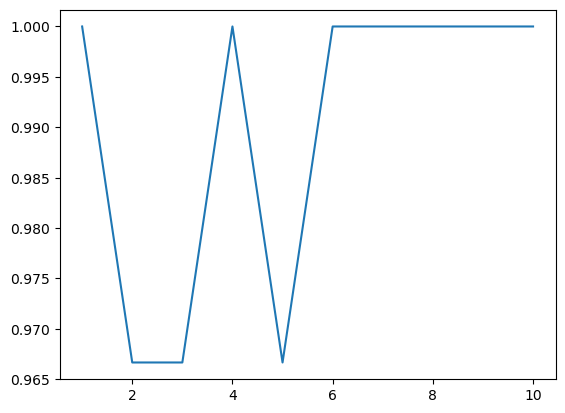

In [188]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.2, random_state=0)
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
knn_1.score(X_test, y_test)

knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train, y_train)
knn_2.score(X_test, y_test)

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
knn_3.score(X_test, y_test)

knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train, y_train)
knn_4.score(X_test, y_test)

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
knn_5.score(X_test, y_test)

knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, y_train)
knn_6.score(X_test, y_test)
            
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
knn_7.score(X_test, y_test)

knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train, y_train)
knn_8.score(X_test, y_test)

knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, y_train)
knn_9.score(X_test, y_test)

knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)
knn_10.score(X_test, y_test)


xpoints = np.array([1, 2,3,4,5,6,7,8,9,10])
ypoints = np.array([knn_1.score(X_test, y_test),knn_2.score(X_test, y_test),
                    knn_3.score(X_test, y_test),knn_4.score(X_test, y_test),
                    knn_5.score(X_test, y_test),knn_6.score(X_test, y_test),
                    knn_7.score(X_test, y_test),knn_8.score(X_test, y_test),
                    knn_9.score(X_test, y_test), knn_10.score(X_test, y_test)])

plt.plot(xpoints, ypoints)


plt.show()

## 3. Classes and Functions in Scikit-learn

[Scikit-learn organization](http://scikit-learn.org/stable/) is as follows:

* [Classification](http://scikitlearn.org/stable/supervised_learning.html#supervised-learning)

* [Regression](http://scikitlearn.org/stable/supervised_learning.html#supervised-learning)

* [Clustering](http://scikit-learn.org/stable/modules/clustering.html#clustering)

* [Dimensionality reduction](http://scikit-learn.org/stable/modules/decomposition.html#decompositions)

* [Model selection](http://scikit-learn.org/stable/model_selection.html#model-selection)

* [Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)

Classification and regression enable [Supervised Learning](http://scikitlearn.org/stable/supervised_learning.html#supervised-learning), while clustering enables [Unsupervised Learning](http://scikit-learn.org/stable/modules/clustering.html#clustering). 

Class and function reference of scikit-learn is available in the [API Reference](http://scikit-learn.org/stable/modules/classes.html). 